# Ising model using Swendsen-Wang algorithm
Random cluster method with a 1d array of Spins. The neighbors are the one on the lattice

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Ising model using a 1d array
L=5
g=2*np.random.randint(2,size=L*L)-1
print(g)

[-1  1  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1
  1]


In [11]:
#List of neighbors
#function that finds once for all the neighobrs

def neig(i,L):
    l=[]
    l.append((i+1+L)%(L)+i//(L)*L)
    l.append((i-1+L)%(L)+i//(L)*L)
    l.append((i+L)%(L*L))
    l.append((i-L)%(L*L))
    return l.copy()

In [12]:
nei=[]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
print(nei)

[[ 1  4  5 20]
 [ 2  0  6 21]
 [ 3  1  7 22]
 [ 4  2  8 23]
 [ 0  3  9 24]
 [ 6  9 10  0]
 [ 7  5 11  1]
 [ 8  6 12  2]
 [ 9  7 13  3]
 [ 5  8 14  4]
 [11 14 15  5]
 [12 10 16  6]
 [13 11 17  7]
 [14 12 18  8]
 [10 13 19  9]
 [16 19 20 10]
 [17 15 21 11]
 [18 16 22 12]
 [19 17 23 13]
 [15 18 24 14]
 [21 24  0 15]
 [22 20  1 16]
 [23 21  2 17]
 [24 22  3 18]
 [20 23  4 19]]


In [13]:
#Example of creation of a cluster
#for all site look at the neighbors, enstablish if they have the same spin 
#and with a probability 1-e^(-2beta) start creating a cluster
#THIS IS WRONG 
#Under estimate of cluster size
k=list(range(g.shape[0]))
cl=[]
T=2.7
tr=1-np.exp(-2/T)
#print(tr)

for i in range(g.shape[0]):
    
    if i in k and i==0:
        l=[]
        l.append(i)
        k.remove(i)
        
    if i in k and i!=0:
        cl.append(l.copy())
        l.clear()
        l.append(i)
        k.remove(i)
        
    for n in nei[i]:
        if n in k and g[i]==g[n] and np.random.uniform(0,1)<tr:
            l.append(n)
            k.remove(n)
cl.append(l.copy())
cl

[[0, 5],
 [1, 6],
 [2],
 [3],
 [4, 10],
 [7],
 [8, 9, 14, 11, 15, 12, 13, 17],
 [16, 18, 22],
 [19],
 [20, 24],
 [21, 23]]

In [52]:
def nie_clu(i,N,j,k):
  L=[]
  for n in N:
    if n in k and g[i]==g[n] and np.random.uniform(0,1)<tr:
      L.append(n)
  if i in k:
    k.remove(i)
  if L:
    for l in L:
      nie_clu(l,nei[l],L,k)
    j.extend(L.copy())

In [53]:
l=[]
k=list(range(L*L))
nie_clu(0,nei[0],l,k)
print(l)
print(list(set(l)))

[]
[]


In [56]:
cl=[]
k=list(range(L*L))
for i in range(L*L):
  if i in k:
    l=[i]
    nie_clu(i,nei[i],l,k)
    l=list(set(l))
    cl.append(l.copy())
  if not k:
    break
cl

[[0, 10, 5],
 [1, 2, 6],
 [3],
 [9, 4, 14],
 [7],
 [8],
 [11, 12, 13, 15, 17, 18, 19, 21, 22, 23],
 [16],
 [24, 20]]

In [24]:
l=[]
if not l:
  print('Hello')

Hello


In [ ]:
m=float(sum(g))/g.shape[0]

In [ ]:
if np.random.uniform(0,1)<0.5:
    r=np.random.randint(0,len(cl))
    for c in cl[r]:
        g[c]*=-1
g

array([-1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1

In [ ]:
def cluster_creation_1(T,L,g):
    tr=1-np.exp(-2./T)
    k=list(range(L*L))
    cl=[]
    
    for i in range(L*L):
    
        if i in k and i==0:
            l.append(i)
            k.remove(i)

        if i in k and i!=0:
            cl.append(l.copy())
            l.clear()
            l.append(i)
            k.remove(i)

        for n in nei[i]:
            if n in k and g[i]==g[n] and np.random.random()<tr:
                l.append(n)
                k.remove(n)
                
    cl.append(l.copy())
    l.clear()
    return cl.copy()

In [ ]:
L=16
g=2*np.random.randint(2,size=L*L)-1
T=float(1.27)
m=[]
nei=[]
m_m=[]
m.append(float(sum(g)/L/L))
m_m.append(m[-1])
tp_p=[0]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
tp=0
cl=[]
k=[]
l=[]
for t in range(300):
    cl=cluster_creation_1(T,L,g)
    
    if np.random.random()<0.5:
        r=np.random.randint(0,len(cl))
        g[cl[r]]*=-1
        
    if t>tp:
        m.append(float(sum(g))/g.shape[0])
        m_m.append(sum(m))
        tp=int(tp*1.1)+1
        tp_p.append(tp)

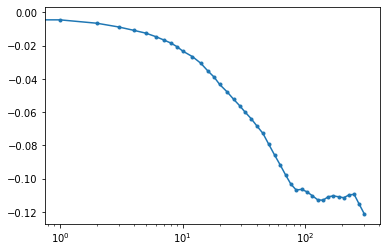

In [ ]:
m=np.asarray(m)
m_m=np.asarray(m_m)/len(m_m)
#plt.plot(abs(m_m))
plt.plot(tp_p,(m_m),'.-')
plt.xscale('log')

In [ ]:
L=12
g=2*np.random.randint(2,size=L*L)-1
m_m=[]
nei=[]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
cl=[]
Te=np.linspace(0.01,3,50)

for T in Te:
    m=[]

    m.append(float(sum(g)/L/L))

    tp=0
    l=[]
    for t in range(500):
        cl.clear()
        cl=cluster_creation_1(T,L,g)

        if np.random.random()<0.5:
            r=np.random.randint(0,len(cl))
            g[cl[r]]*=-1

        if t>tp:
            m.append(float(sum(g))/L/L)
            tp=int(tp*1.1)+1
    m=np.asarray(m)
    m_m.append([abs(m).mean(),m.var()])
    
m_m=np.asarray(m_m)

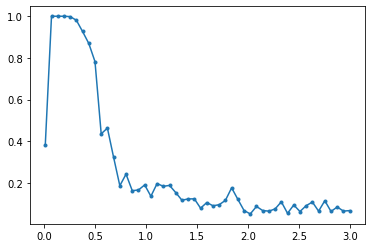

In [ ]:
plt.plot(Te,m_m[:,0],'.-')